In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Define the Grid-World Environment

In [ ]:
# Define Grid World Environment
grid_size = (4, 4)  # 4x4 Grid
gamma = 0.9  # Discount factor
theta = 1e-6  # Convergence threshold

# Initialize rewards
reward_grid = np.zeros(grid_size)
reward_grid[3, 3] = 1  # Goal state reward

# Possible actions: Up, Down, Left, Right
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Function to check if a state is terminal
def is_terminal(state):
    return state == (3, 3)  # Goal state

## Visualizing the Initial Grid World

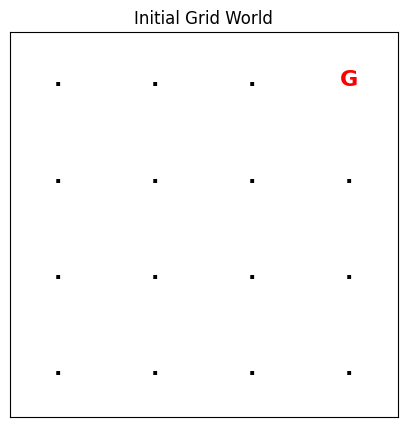

In [ ]:
def visualize_initial_grid(grid_size):
    fig, ax = plt.subplots(figsize=(5, 5))

    ax.set_xticks(np.arange(grid_size[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid_size[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if is_terminal((i, j)):
                ax.text(j, i, "G", ha="center", va="center", fontsize=16, fontweight="bold", color="red")
            else:
                ax.text(j, i, ".", ha="center", va="center", fontsize=16, fontweight="bold")

    ax.set_title("Initial Grid World")
    plt.show()

# Call this function after defining the environment
visualize_initial_grid(grid_size)

## Implement Policy Evaluation

In [ ]:
def policy_evaluation(policy, V, theta, gamma):
    value_convergence = []  # Store value updates for plotting

    while True:
        delta = 0
        new_V = np.copy(V)

        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                if is_terminal((i, j)):
                    continue  # Skip goal state

                v = 0
                for a, action in enumerate(actions):
                    next_i, next_j = i + action[0], j + action[1]

                    # Stay in place if out of bounds
                    if 0 <= next_i < grid_size[0] and 0 <= next_j < grid_size[1]:
                        next_state = (next_i, next_j)
                    else:
                        next_state = (i, j)

                    # Bellman update
                    v += policy[i, j, a] * (reward_grid[next_state] + gamma * V[next_state])

                new_V[i, j] = v
                delta = max(delta, abs(V[i, j] - v))

        V = new_V
        value_convergence.append(np.sum(V))  # Track total value

        if delta < theta:
            break

    return V, value_convergence

## Implement Policy Iteration

In [ ]:
def policy_iteration(grid_size, gamma, theta):
    V = np.zeros(grid_size)
    policy = np.random.choice([0, 1, 2, 3], size=grid_size)  # Random initial policy

    value_convergence = []  # Track convergence over iterations

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            new_V = np.copy(V)

            for i in range(grid_size[0]):
                for j in range(grid_size[1]):
                    if is_terminal((i, j)):
                        continue

                    action = actions[policy[i, j]]
                    next_i, next_j = i + action[0], j + action[1]

                    if 0 <= next_i < grid_size[0] and 0 <= next_j < grid_size[1]:
                        next_state = (next_i, next_j)
                    else:
                        next_state = (i, j)

                    # Bellman update
                    v = reward_grid[next_state] + gamma * V[next_state]
                    new_V[i, j] = v
                    delta = max(delta, abs(V[i, j] - v))

            V = new_V
            value_convergence.append(np.sum(V))

            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True

        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                if is_terminal((i, j)):
                    continue

                action_values = []
                for action in actions:
                    next_i, next_j = i + action[0], j + action[1]

                    if 0 <= next_i < grid_size[0] and 0 <= next_j < grid_size[1]:
                        next_state = (next_i, next_j)
                    else:
                        next_state = (i, j)

                    action_values.append(reward_grid[next_state] + gamma * V[next_state])

                best_action = np.argmax(action_values)

                if policy[i, j] != best_action:
                    policy_stable = False

                policy[i, j] = best_action

        if policy_stable:
            break

    return V, policy, value_convergence

## Visualization of the Grid World Before & After Execution

In [ ]:
def visualize_grid_world(initial_policy, optimal_policy, grid_size):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    direction_arrows = {0: "↑", 1: "↓", 2: "←", 3: "→"}

    for idx, (policy, title) in enumerate(zip([initial_policy, optimal_policy],
                                              ["Initial Random Policy", "Optimal Policy"])):
        ax = axes[idx]
        ax.set_xticks(np.arange(grid_size[1] + 1) - 0.5, minor=True)
        ax.set_yticks(np.arange(grid_size[0] + 1) - 0.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                if is_terminal((i, j)):
                    ax.text(j, i, "G", ha="center", va="center", fontsize=16, fontweight="bold", color="red")
                else:
                    ax.text(j, i, direction_arrows[policy[i, j]], ha="center", va="center", fontsize=16, fontweight="bold")

        ax.set_title(title)

    plt.show()

## Plot Value Function Convergence

In [ ]:
def plot_convergence(value_convergence):
    plt.figure(figsize=(8, 5))
    plt.plot(value_convergence, marker="o", linestyle="-", color="b")
    plt.xlabel("Iterations")
    plt.ylabel("Total State Value")
    plt.title("Value Function Convergence")
    plt.grid(True)
    plt.show()

## Execute the Policy Iteration Algorithm

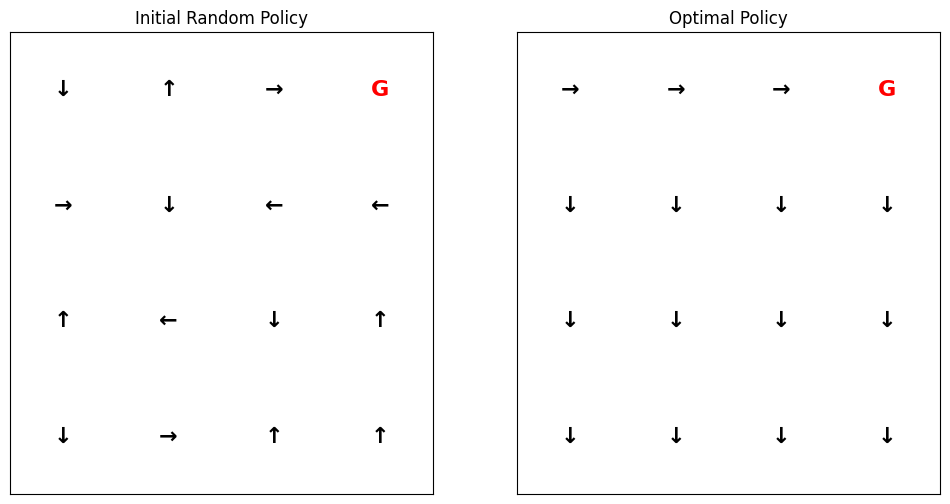

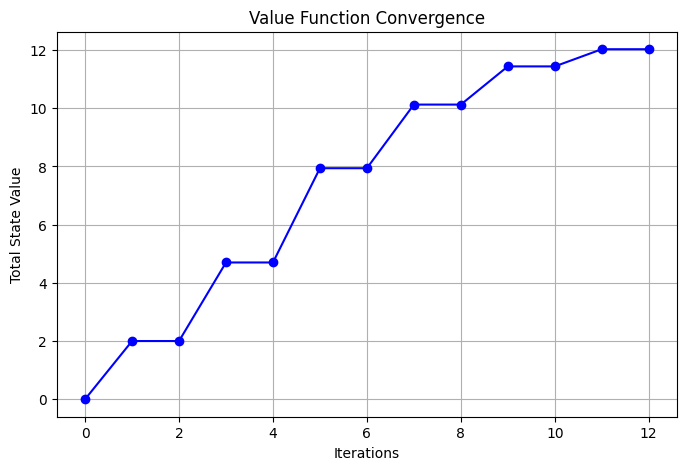

In [ ]:
# Generate a random initial policy for visualization before execution
initial_policy = np.random.choice([0, 1, 2, 3], size=grid_size)

# Run Policy Iteration
optimal_values, optimal_policy, value_convergence = policy_iteration(grid_size, gamma, theta)

# Visualize Grid World Before and After Execution
visualize_grid_world(initial_policy, optimal_policy, grid_size)

# Plot Convergence of Value Function
plot_convergence(value_convergence)